# Escola Americana de Santos
# Trabalho de Conclusão de Curso do Ensimo Médio
# Análise de Dados com Python
## Discente: Salwa Riad El Malt
### Docente: Lucas Batista de Souza

### Dados Analisados: Indicadores Sociais IBGE do Senso DEmográfico 2022

Tabela 1.13 - Rendimento médio real do trabalho principal habitualmente recebido por mês (R$)
pelas pessoas de 14 anos ou mais de idade, ocupadas nassemana de referência, por sexo, cor
ou raça e grupos de idade, segundo Grandes Regiões, Unidades da Federação e Municípios dsa 
Catalpis.

[Disponível](https://www.ibge.gov.br/estatisticas/multidominio/condicoes-de-vida-desigualdade-e-pobreza/9221-sintese-de-indicadores-sociais.html)]ml)
tai

# DataFrame Análise de Dados

## 1. Importação de Bibliotecas, Carregamento, Limpeza, Padronização e Formatação da Planilha

In [10]:
# Planilha 01

import pandas as pd

# Carregar a tabela Excel
xlsx = pd.ExcelFile("Tabela_1.13_OcupCaract_Geo_Rend_1.5.xls")

# Exibir os nomes das abas disponíveis
sheet_names = xlsx.sheet_names
print("Abas disponíveis na planilha:", sheet_names)

# Para cada aba, ler e exibir os conteúdos com formatação
for sheet in sheet_names:
    dados_aba = pd.read_excel("Tabela_1.13_OcupCaract_Geo_Rend_1.5.xls", sheet_name=sheet, header=0, index_col=0)
    dados_aba = dados_aba.dropna()  # Essa linha adicionada remove linhas com valores NaN

    # Função para formatar números em cada coluna
    def format_numbers(column):
        return column.apply(lambda x: f'{x:,.2f}' if isinstance(x, (int, float)) else x)

    # Exibir os dados formatados
    print("\n\nConteúdo da aba:", sheet)
    print(dados_aba.apply(format_numbers, axis=0))

Abas disponíveis na planilha: ['2021', '2020', '2019', '2018', '2017', '2016', '2015', '2014', '2013', '2012']


Conteúdo da aba: 2021
                        Total    Homens  Mulheres    Branca Preta ou parda  \
Localidades                                                                  
Brasil               2,405.76  2,622.13  2,094.91  3,098.91       1,804.42   
Norte                1,812.33  1,886.97  1,683.80  2,477.97       1,651.11   
Rondônia             1,998.08  2,153.94  1,732.26  2,209.92       1,891.02   
Porto Velho          2,246.72  2,360.31  2,078.93  2,728.12       2,099.38   
Acre                 1,913.57  2,005.90  1,768.51  2,497.62       1,791.32   
Rio Branco           2,132.93  2,324.11  1,891.77  2,709.00       1,987.84   
Amazonas             1,789.62  1,878.54  1,642.15  2,501.46       1,654.95   
Manaus               2,129.83  2,349.29  1,823.22  2,857.51       1,955.21   
Roraima              2,248.66  2,329.42  2,124.97  3,560.76       1,924.86   
Boa Vis

## 2. Plotagem dos Gráficos e Análises

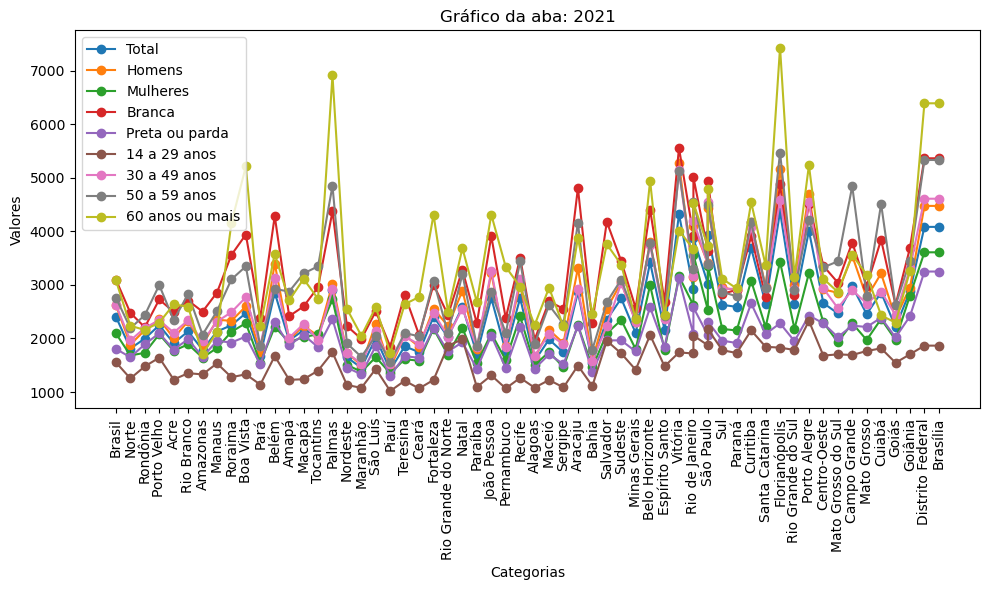

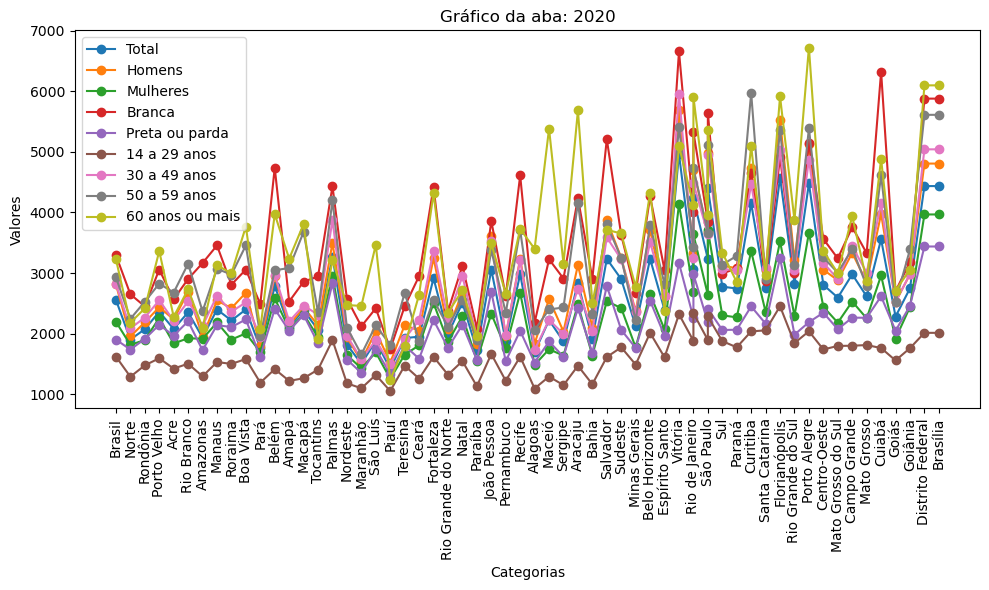

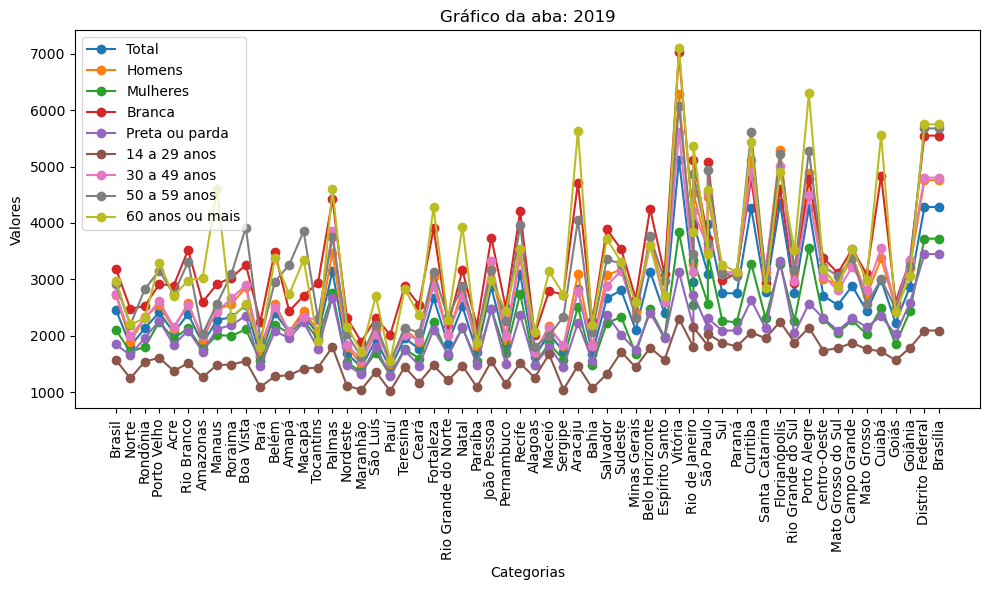

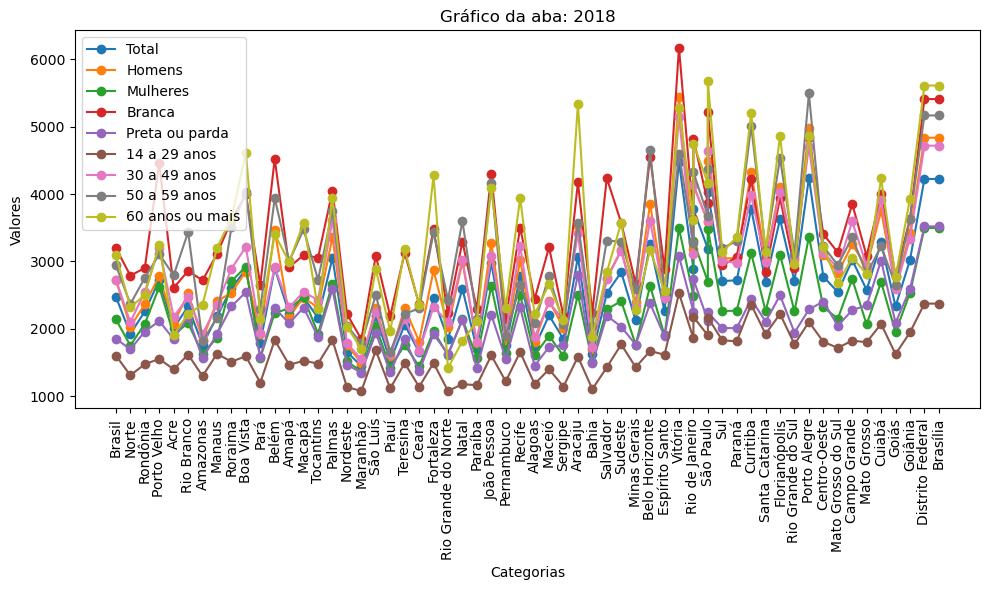

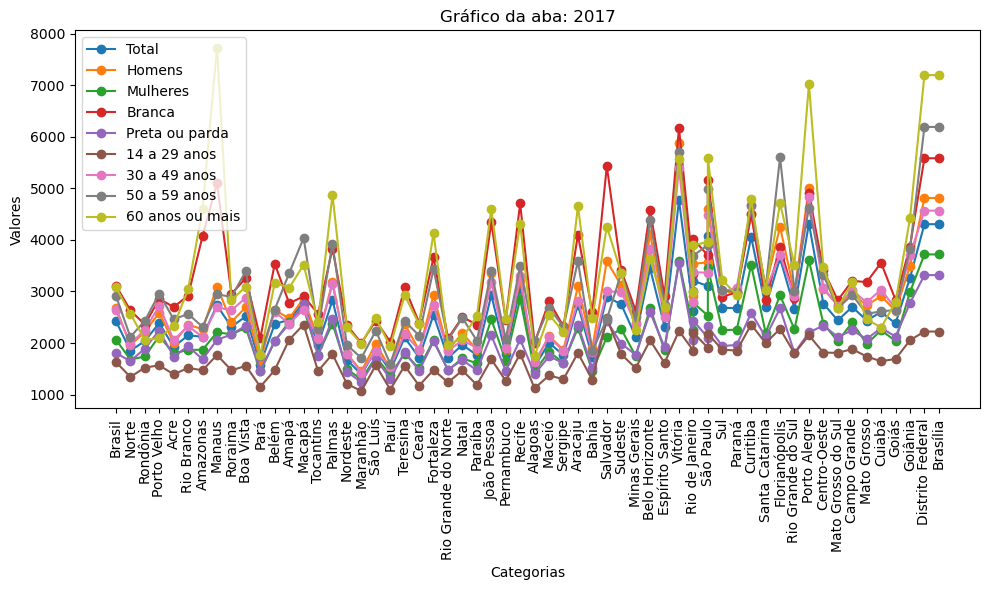

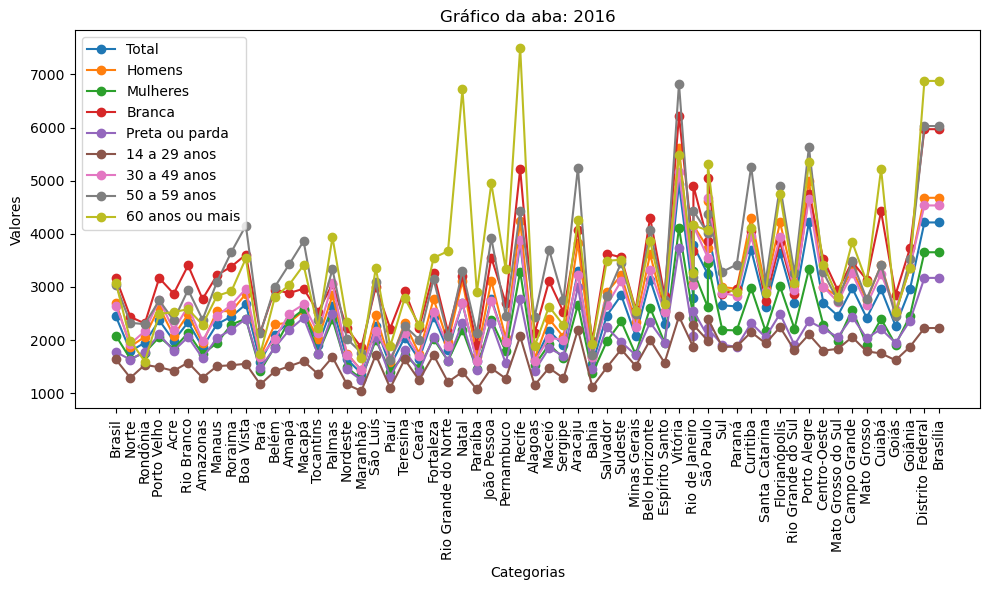

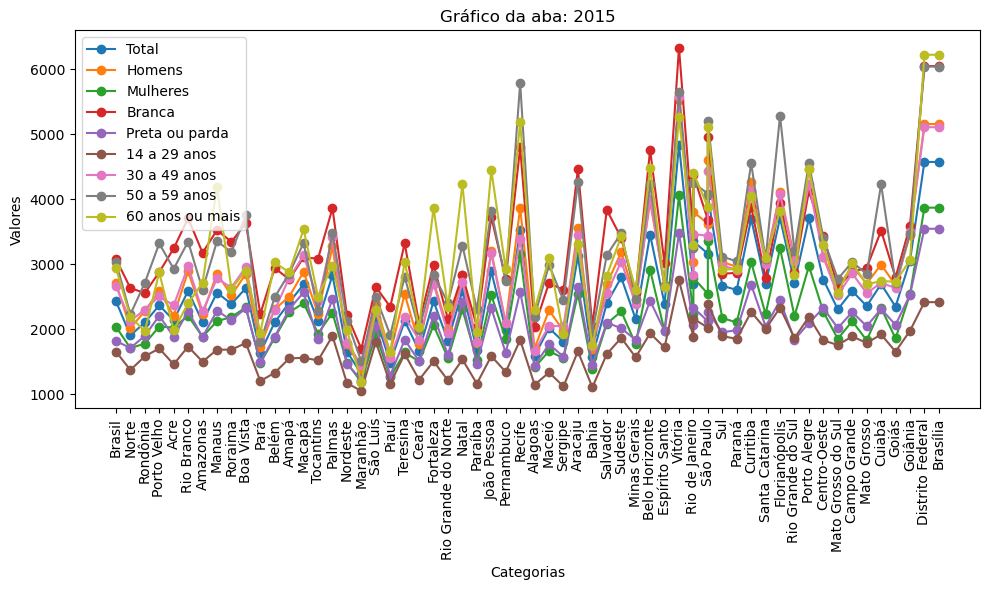

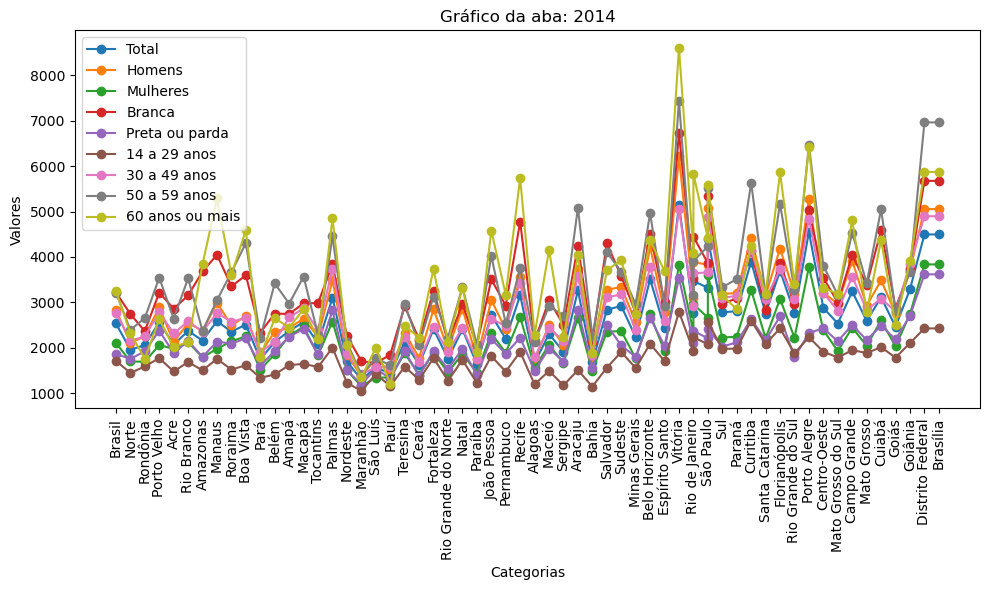

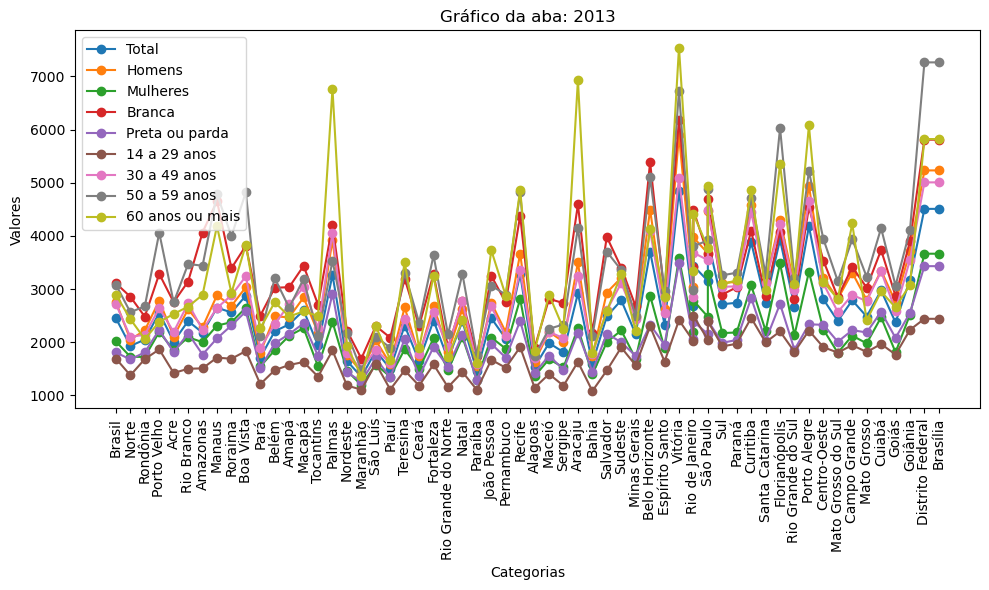

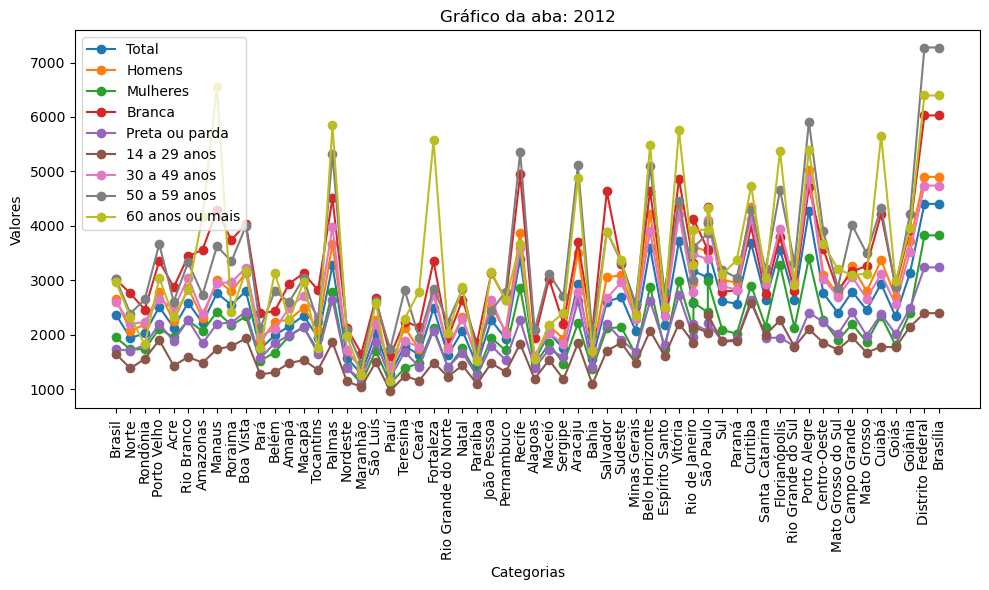

In [11]:
# Série de Gráficos 01

import pandas as pd
import matplotlib.pyplot as plt

# Carregar a tabela Excel
xlsx = pd.ExcelFile("Tabela_1.13_OcupCaract_Geo_Rend_1.5.xls")

# Exibir os nomes das abas disponíveis
sheet_names = xlsx.sheet_names

# Para cada aba, ler os dados e gerar gráficos
for sheet in sheet_names:
    dados_aba = pd.read_excel("Tabela_1.13_OcupCaract_Geo_Rend_1.5.xls", sheet_name=sheet, header=0, index_col=0)
    dados_aba = dados_aba.dropna()

    # Plotar os gráficos para cada coluna
    plt.figure(figsize=(10, 6))
    for column in dados_aba.columns:
        plt.plot(dados_aba.index, dados_aba[column], marker='o', label=column)

    plt.title(f'Gráfico da aba: {sheet}')
    plt.xlabel('Categorias')
    plt.ylabel('Valores')
    plt.legend()
    plt.xticks(rotation=90)
    plt.tight_layout()
    plt.show() # Mostrar os gráficos

In [ ]:
# Série de Gráficos 02 , apenas Estados do Brasil

import pandas as pd
import matplotlib.pyplot as plt

# Carregar a tabela Excel
xlsx = pd.ExcelFile("Tabela_1.13_OcupCaract_Geo_Rend_1.5.xls")

# Exibir os nomes das abas disponíveis
sheet_names = xlsx.sheet_names

# Lista de estados brasileiros
estados_brasileiros = ['Rondônia', 'Acre', 'Amazonas', 'Roraima', 'Pará', 'Amapá', 'Tocantins', 'Maranhão', 'Piauí',
                       'Ceará', 'Rio Grande do Norte', 'Paraíba', 'Pernambuco', 'Alagoas', 'Sergipe', 'Bahia',
                       'Minas Gerais', 'Espírito Santo', 'Rio de Janeiro', 'São Paulo', 'Paraná', 'Santa Catarina',
                       'Rio Grande do Sul', 'Mato Grosso do Sul', 'Mato Grosso', 'Goiás', 'Distrito Federal']

# Para cada aba, gerar gráficos com os dados correspondentes aos estados
for sheet in sheet_names:
    dados_aba = pd.read_excel("Tabela_1.13_OcupCaract_Geo_Rend_1.5.xls", sheet_name=sheet, header=0, index_col=0)
    dados_aba = dados_aba.dropna()

    # Exibir somente os dados dos estados brasileiros
    dados_estados = dados_aba.loc[estados_brasileiros]

    # Gerar gráficos para cada estado
    for estado in estados_brasileiros:
        dados_estado = dados_estados.loc[[estado]]
        dados_estado = dados_estado.T  # Transpor os dados para adequar ao gráfico

        plt.figure(figsize=(10, 6))
        plt.plot(dados_estado.index, dados_estado[estado], marker='o', linestyle='-')
        plt.title(f'Dados de {estado} na aba {sheet}')
        plt.xlabel('Ano')  # Personalize os rótulos conforme as colunas do arquivo
        plt.ylabel('Valores')  # Personalize os rótulos conforme os valores do arquivo
        plt.xticks(rotation=45)  # Rotaciona os rótulos do eixo x para melhor leitura
        plt.grid(True)
        plt.tight_layout()

        plt.show()

In [ ]:
# Série de Gráficos 03

import pandas as pd
import matplotlib.pyplot as plt

# Lista de Estados brasileiros
estados_brasileiros = ['Rondônia', 'Acre', 'Amazonas', 'Roraima', 'Pará', 'Amapá', 'Tocantins', 'Maranhão', 
                       'Piauí', 'Ceará', 'Rio Grande do Norte', 'Paraíba', 'Pernambuco', 'Alagoas', 'Sergipe', 
                       'Bahia', 'Minas Gerais', 'Espírito Santo', 'Rio de Janeiro', 'São Paulo', 'Paraná', 
                       'Santa Catarina', 'Rio Grande do Sul', 'Mato Grosso do Sul', 'Mato Grosso', 'Goiás', 
                       'Distrito Federal']

# Carregar a tabela Excel
xlsx = pd.ExcelFile("Tabela_1.13_OcupCaract_Geo_Rend_1.5.xls")

# Exibir os nomes das abas disponíveis
sheet_names = xlsx.sheet_names

# Para cada aba, ler os dados e gerar gráficos
for sheet in sheet_names:
    dados_aba = pd.read_excel("Tabela_1.13_OcupCaract_Geo_Rend_1.5.xls", sheet_name=sheet, header=0, index_col=0)
    dados_aba = dados_aba.dropna()

    # Filtrar somente os dados dos Estados brasileiros
    dados_estados = dados_aba.loc[estados_brasileiros]

    # Plotar os gráficos para cada coluna em um único gráfico
    plt.figure(figsize=(12, 8))
    for column in dados_estados.columns:
        plt.plot(dados_estados.index, dados_estados[column], marker='o', label=column)

    plt.title(f'Dados dos Estados na aba: {sheet}')
    plt.xlabel('Estados')
    plt.ylabel('Valores')
    plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
    plt.xticks(rotation=90)
    plt.tight_layout()
    # Salvar o gráfico como uma imagem
    plt.savefig('exemplo_grafico.png')
    plt.show()

## 3. Mapas

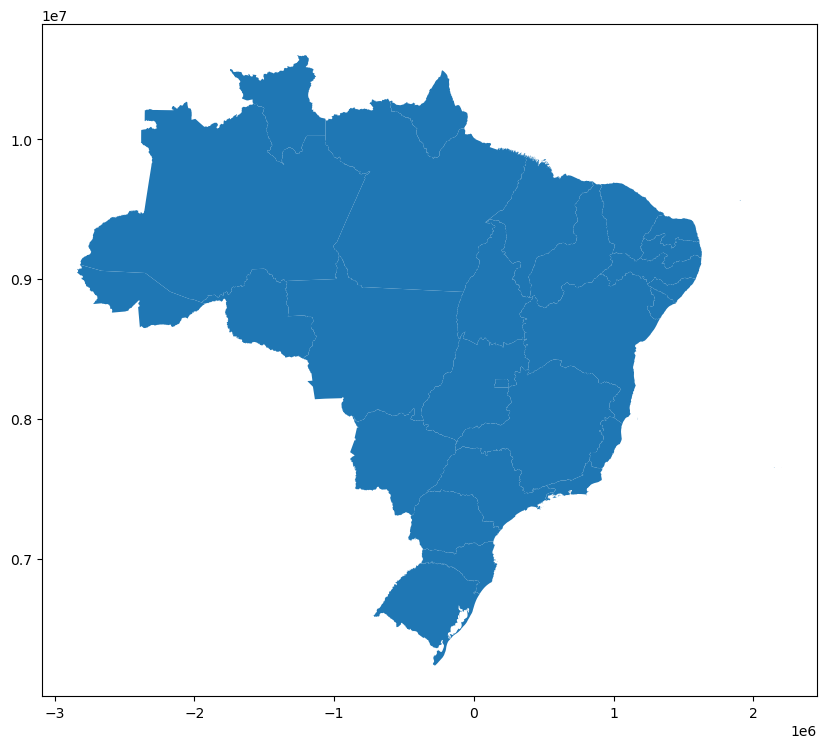

In [8]:
import geopandas as gpd
import matplotlib.pyplot as plt

# Carregar o shapefile dos estados do Brasil
caminho_shapefile = 'SHP/BRUF/BRUF.shp'
mapa_estados = gpd.read_file(caminho_shapefile)

# Exibir o mapa
mapa_estados.plot(figsize=(10, 10))
plt.show()

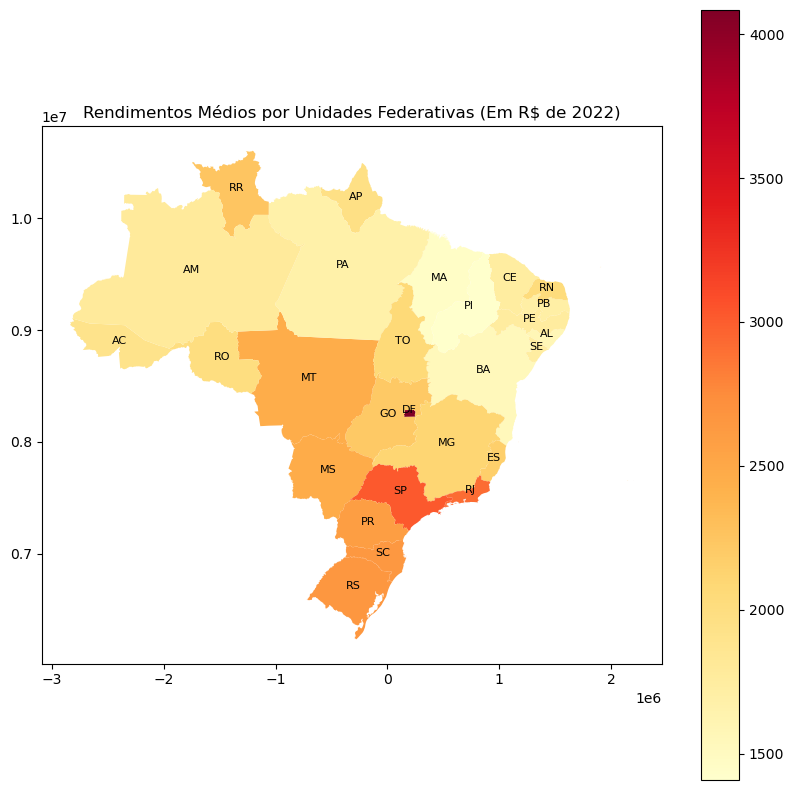

In [9]:
import geopandas as gpd
import matplotlib.pyplot as plt

# Carregar o shapefile dos estados do Brasil
caminho_shapefile = 'SHP/BRUF/BRUF.shp'
mapa_estados = gpd.read_file(caminho_shapefile)

# Plotar o mapa cloroplético
fig, ax = plt.subplots(1, 1, figsize=(10, 10))
mapa_estados.plot(column='TOTAL', cmap='YlOrRd', ax=ax, legend=True)

# Exibir o nome dos estados
for x, y, label in zip(mapa_estados.geometry.centroid.x, mapa_estados.geometry.centroid.y, mapa_estados['NM_ESTADO']):
    ax.text(x, y, label, fontsize=8, ha='center')

# Adicionar título ao mapa
plt.title('Rendimentos Médios por Unidades Federativas (Em R$ de 2022)')

# Exibir o mapa
plt.show()

## 4. Download dos Gráficos e Mapas

In [ ]:
# Dowload Série de gráficos 01
import pandas as pd
import matplotlib.pyplot as plt

# Carregar a tabela Excel
xlsx = pd.ExcelFile("Tabela_1.13_OcupCaract_Geo_Rend_1.5.xls")

# Exibir os nomes das abas disponíveis
sheet_names = xlsx.sheet_names

# Para cada aba, ler os dados e gerar gráficos
for sheet in sheet_names:
    dados_aba = pd.read_excel("Tabela_1.13_OcupCaract_Geo_Rend_1.5.xls", sheet_name=sheet, header=0, index_col=0)
    dados_aba = dados_aba.dropna()

    # Plotar os gráficos para cada coluna
    plt.figure(figsize=(10, 6))
    for column in dados_aba.columns:
        plt.plot(dados_aba.index, dados_aba[column], marker='o', label=column)

    plt.title(f'Gráfico da aba: {sheet}')
    plt.xlabel('Categorias')
    plt.ylabel('Valores')
    plt.legend()
    plt.xticks(rotation=90)
    plt.tight_layout()

    # Salvar o gráfico como um arquivo separado
    plt.savefig(f'grafico_{sheet}.png')  # Salvar o gráfico como um arquivo PNG

    plt.close()  # Fecha o gráfico atual para liberar memória e evitar a exibição no notebook

    # Atenção: isso gerará arquivos separados para cada aba no formato PNG

In [ ]:
# Dowload Série de Gráficos 02

import pandas as pd
import matplotlib.pyplot as plt

# Carregar a tabela Excel
xlsx = pd.ExcelFile("Tabela_1.13_OcupCaract_Geo_Rend_1.5.xls")

# Exibir os nomes das abas disponíveis
sheet_names = xlsx.sheet_names

# Lista de estados brasileiros
estados_brasileiros = ['Rondônia', 'Acre', 'Amazonas', 'Roraima', 'Pará', 'Amapá', 'Tocantins', 'Maranhão', 'Piauí',
                       'Ceará', 'Rio Grande do Norte', 'Paraíba', 'Pernambuco', 'Alagoas', 'Sergipe', 'Bahia',
                       'Minas Gerais', 'Espírito Santo', 'Rio de Janeiro', 'São Paulo', 'Paraná', 'Santa Catarina',
                       'Rio Grande do Sul', 'Mato Grosso do Sul', 'Mato Grosso', 'Goiás', 'Distrito Federal']

# Para cada aba, gerar gráficos com os dados correspondentes aos estados
for sheet in sheet_names:
    dados_aba = pd.read_excel("Tabela_1.13_OcupCaract_Geo_Rend_1.5.xls", sheet_name=sheet, header=0, index_col=0)
    dados_aba = dados_aba.dropna()

    # Exibir somente os dados dos estados brasileiros
    dados_estados = dados_aba.loc[estados_brasileiros]

    # Gerar gráficos para cada estado
    for estado in estados_brasileiros:
        dados_estado = dados_estados.loc[[estado]]
        dados_estado = dados_estado.T  # Transpor os dados para adequar ao gráfico

        plt.figure(figsize=(10, 6))
        plt.plot(dados_estado.index, dados_estado[estado], marker='o', linestyle='-')
        plt.title(f'Dados de {estado} na aba {sheet}')
        plt.xlabel('Ano')  # Personalize os rótulos conforme as colunas do arquivo
        plt.ylabel('Valores')  # Personalize os rótulos conforme os valores do arquivo
        plt.xticks(rotation=45)  # Rotaciona os rótulos do eixo x para melhor leitura
        plt.grid(True)
        plt.tight_layout()

        # Salvar o gráfico como um arquivo separado
        plt.savefig(f'grafico_{sheet}.png')  # Salvar o gráfico como um arquivo PNG

        plt.close()  # Fecha o gráfico atual para liberar memória e evitar a exibição no notebook

        # Atenção: isso gerará arquivos separados para cada aba no formato PNG

In [ ]:
# Dowload Série de Gráficos 03

import pandas as pd
import matplotlib.pyplot as plt

# Lista de Estados brasileiros
estados_brasileiros = ['Rondônia', 'Acre', 'Amazonas', 'Roraima', 'Pará', 'Amapá', 'Tocantins', 'Maranhão', 
                       'Piauí', 'Ceará', 'Rio Grande do Norte', 'Paraíba', 'Pernambuco', 'Alagoas', 'Sergipe', 
                       'Bahia', 'Minas Gerais', 'Espírito Santo', 'Rio de Janeiro', 'São Paulo', 'Paraná', 
                       'Santa Catarina', 'Rio Grande do Sul', 'Mato Grosso do Sul', 'Mato Grosso', 'Goiás', 
                       'Distrito Federal']

# Carregar a tabela Excel
xlsx = pd.ExcelFile("Tabela_1.13_OcupCaract_Geo_Rend_1.5.xls")

# Exibir os nomes das abas disponíveis
sheet_names = xlsx.sheet_names

# Para cada aba, ler os dados e gerar gráficos
for sheet in sheet_names:
    dados_aba = pd.read_excel("Tabela_1.13_OcupCaract_Geo_Rend_1.5.xls", sheet_name=sheet, header=0, index_col=0)
    dados_aba = dados_aba.dropna()

    # Filtrar somente os dados dos Estados brasileiros
    dados_estados = dados_aba.loc[estados_brasileiros]

    # Plotar os gráficos para cada coluna em um único gráfico
    plt.figure(figsize=(12, 8))
    for column in dados_estados.columns:
        plt.plot(dados_estados.index, dados_estados[column], marker='o', label=column)

    plt.title(f'Dados dos Estados na aba: {sheet}')
    plt.xlabel('Estados')
    plt.ylabel('Valores')
    plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
    plt.xticks(rotation=45)
    plt.tight_layout()
        
    # Salvar o gráfico como um arquivo separado
    plt.savefig(f'grafico_{sheet}.png')  # Salvar o gráfico como um arquivo PNG

    plt.close()  # Fecha o gráfico atual para liberar memória e evitar a exibição no notebook

    # Atenção: isso gerará arquivos separados para cada aba no formato PNG

In [ ]:
# Download Mapa 01

import geopandas as gpd
import matplotlib.pyplot as plt

# Carregar o shapefile dos estados do Brasil
caminho_shapefile = 'SHP/BRUF/BRUF.shp'
mapa_estados = gpd.read_file(caminho_shapefile)

# Exibir o mapa
fig, ax = plt.subplots(figsize=(10, 10))
mapa_estados.plot(ax=ax)

# Salvar o mapa como um arquivo PNG
plt.savefig('mapa_estados.png', bbox_inches='tight', pad_inches=0.1)

# Exibir o mapa no Jupyter Notebook
plt.show()


In [ ]:
# Download Mapa 02

import geopandas as gpd
import matplotlib.pyplot as plt

# Carregar o shapefile dos estados do Brasil
caminho_shapefile = 'SHP/BRUF/BRUF.shp'
mapa_estados = gpd.read_file(caminho_shapefile)

# Plotar o mapa cloroplético
fig, ax = plt.subplots(1, 1, figsize=(10, 10))
mapa_estados.plot(column='TOTAL', cmap='YlOrRd', ax=ax, legend=True)

# Exibir o nome dos estados
for x, y, label in zip(mapa_estados.geometry.centroid.x, mapa_estados.geometry.centroid.y, mapa_estados['NM_ESTADO']):
    ax.text(x, y, label, fontsize=8, ha='center')

# Adicionar título ao mapa
plt.title('Rendimentos Médios por Unidades Federativas (R$ 2021)')

# Salvar o mapa como um arquivo PNG
plt.savefig('mapa_rendimentos.png', bbox_inches='tight', pad_inches=0.1)